
9-1: 문제 설정

먼저 관심있는 데이터를 수집했고, 그 데이터에 대해 뭔가 궁금하게 생각하는 의문이 있을 것이다.

예를 들어 '따릉이' 데이터에 대해 (1) 대여가 증가하는 추세인지? (2) 계절별로 차이가 있는지? 의문 또는 문제를 가질 수 있겠다.

이러한 의문은 증명가능하도록 만들어져야 분석을 통해 답할 수 있다.

문제는 2개만 만들자.

### 내가 수집했던 데이터는 8,9월 코로나 확진자의 지역과 날짜가 들어있는 데이터다.

### 설정한 문제 
(1) 코로나 확진자 수가 증가하는 추세인지? 
(2) 지역별로 코로나 확진자 수의 차이가 있는지? 

9-2: 문제의 답

데이터를 분석을 하고 앞서 앞서 제기된 문제에 대해 답을 하자.

대여가 증가하는 추세이면 시간별로 대여건수가 늘어나는지 분석을 하여 (1) 맞다 또는 (2) 맞지 않다라고 결정할 수 있어야 한다.

시간별 대여건수를 그래프로 시각화하여 보여줄 수도 있다.

정량데이터이면 describe, groupBy, 통계검증 (anova), 상관관계 등 강의에서 배운 명령어를 활용하자.

정성데이터는 단어빈도를 계산해서, 어떤 단어가 많이 사용되었는지 분석할 수 있다.

### 설정한 문제의 답 

In [1]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [77]:
jfile= os.path.join('src','week3_assignment.json')
coronaDf= spark.read.json(jfile)

In [78]:
df = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', delimiter=',')\
        .load(os.path.join('data','week3_assignment.csv'))

In [101]:
from pyspark.sql import functions as F

df = df.drop('year')
df =df.withColumn('month', df['확진일'].substr(6,1)).withColumn("day", df["확진일"].substr(8,2))

+---------+--------+-----+---+
|   확진일|    지역|month|day|
+---------+--------+-----+---+
|2021.9.30|    기타|    9| 30|
|2021.9.30|  성북구|    9| 30|
|2021.9.30|  성북구|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|  강북구|    9| 30|
|2021.9.30|  송파구|    9| 30|
|2021.9.30|  동작구|    9| 30|
|2021.9.30|  타시도|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|서대문구|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|  중랑구|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|    기타|    9| 30|
|2021.9.30|  은평구|    9| 30|
|2021.9.30|  성동구|    9| 30|
|2021.9.30|  은평구|    9| 30|
|2021.9.30|  송파구|    9| 30|
+---------+--------+-----+---+
only showing top 20 rows



### (1) 번 문제  
문제 코로나 확진자 수가 증가하는 추세인지? -> 정답: 맞다.

표와 그래프를 보면 8월보다 9월에 더 많은 사람들이 코로나에 걸린것을 볼 수가 있다. 

In [151]:
df.groupBy(df['month']).count().show()

+-----+-----+
|month|count|
+-----+-----+
|    8|15193|
|    9|21383|
+-----+-----+



In [152]:
import pandas as pd
pd = df.toPandas()

In [153]:
ndf = pd.groupby('month').aggregate({"확진일":"count"})

<AxesSubplot:xlabel='month'>

/Users/nadonghyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nadonghyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nadonghyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nadonghyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/nadonghyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/nadonghyeon/opt/anaconda3/lib/py

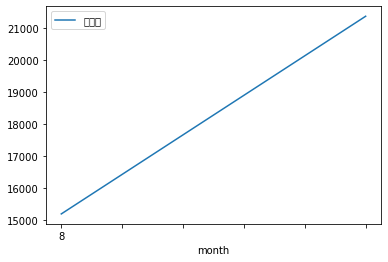

In [154]:
ndf.plot(kind='line')

### (2) 번 문제
8,9월 모두 지역별로 코로나 확진자 수의 차이가 있는지? -> 정답: 맞다.

두가지의 방법으로 풀었다. 8월 9월에 지역별로 확진자 수를 세어준 것이다. 표를 보면 지역별로 확진자의 수를 보았을때 8월 9월 모두 확진자의 수가 겹치지 않는다. 

In [173]:
# 방법 1
df.groupBy("지역").pivot("month").count().show(27)

+--------+----+----+
|    지역|   8|   9|
+--------+----+----+
|  송파구| 930|1696|
|  도봉구| 249| 523|
|  은평구| 718| 931|
|  양천구| 599| 613|
|  중랑구| 539| 662|
|  강동구| 456| 884|
|  용산구| 440| 416|
|  구로구| 630|1424|
|  마포구| 713| 765|
|    기타|  67| 159|
|  강서구| 651| 895|
|  강남구|1287|1224|
|  광진구| 531| 891|
|  성동구| 370| 593|
|  관악구|1001|1064|
|영등포구| 840|1130|
|  타시도| 740|1042|
|동대문구| 443| 957|
|  동작구| 680| 708|
|    중구| 245| 550|
|  종로구| 233| 405|
|  노원구| 404| 716|
|서대문구| 530| 547|
|  금천구| 374| 595|
|  성북구| 516| 781|
|  강북구| 333| 568|
|  서초구| 674| 644|
+--------+----+----+



In [161]:
#방법 2 
df.stat.crosstab("month", "지역").show()

+----------+------+------+------+------+------+------+------+------+----+------+------+--------+------+------+--------+------+------+------+------+------+--------+------+------+------+----+------+------+
|month_지역|강남구|강동구|강북구|강서구|관악구|광진구|구로구|금천구|기타|노원구|도봉구|동대문구|동작구|마포구|서대문구|서초구|성동구|성북구|송파구|양천구|영등포구|용산구|은평구|종로구|중구|중랑구|타시도|
+----------+------+------+------+------+------+------+------+------+----+------+------+--------+------+------+--------+------+------+------+------+------+--------+------+------+------+----+------+------+
|         8|  1287|   456|   333|   651|  1001|   531|   630|   374|  67|   404|   249|     443|   680|   713|     530|   674|   370|   516|   930|   599|     840|   440|   718|   233| 245|   539|   740|
|         9|  1224|   884|   568|   895|  1064|   891|  1424|   595| 159|   716|   523|     957|   708|   765|     547|   644|   593|   781|  1696|   613|    1130|   416|   931|   405| 550|   662|  1042|
+----------+------+------+------+------+------+------+------+---